In [ ]:
!wget --no-check-certificate https://storage.googleapis.com/platzi-tf2/sign-language-img.zip \
    -O ./data/sign-language-img.zip

In [ ]:
import os
import zipfile

local_zip = "./data/sign-language-img.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("./data/sign-language-img")
zip_ref.close()

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import string
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

2023-09-10 14:56:18.577210: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-10 14:56:18.768318: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-09-10 14:56:18.768339: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-09-10 14:56:18.769455: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-09-10 14:56:18.849746: I tensorflow/core/platform/cpu_feature_g

In [2]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
train_dir = "./data/sign-language-img/Train"
test_dir = "./data/sign-language-img/Test"

In [4]:
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255, validation_split= 0.2)

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size= (28,28),
    batch_size= 256,
    class_mode="categorical",
    color_mode="grayscale",
    subset="training"
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size= (28,28),
    batch_size= 256,
    class_mode="categorical",
    color_mode="grayscale",
    subset="validation"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size= (28,28),
    batch_size= 256,
    class_mode="categorical",
    color_mode="grayscale"
)

Found 27455 images belonging to 24 classes.
Found 1425 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


In [6]:
classes = [char for char in string.ascii_uppercase if char != "J" if char != "Z"]
classes

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y']

In [7]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize = (10, 10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img[:,:,0])
        ax.axis("off")
    plt.tight_layout()
    plt.show()

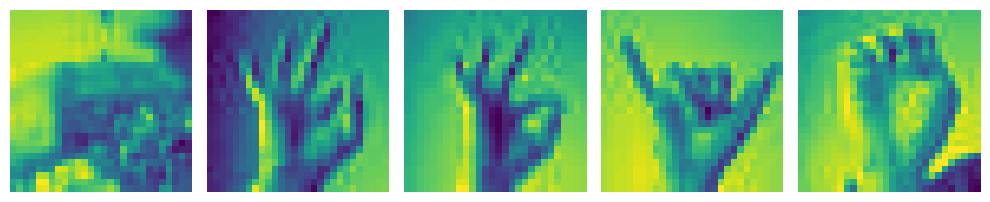

In [8]:
sample_training_images, _ = next(train_generator)
plotImages(sample_training_images[:5])

In [9]:
from keras import models, optimizers, regularizers
from keras.models import Sequential, clone_model
from keras.layers import Flatten, Dense, Dropout, Activation

In [10]:
model_base = Sequential([
    Flatten(input_shape = (28, 28, 1)),
    Dense(256, activation= "relu"),
    Dense(128, activation= "relu"),
    Dense(len(classes), activation= "softmax")
])

2023-09-10 14:57:06.145241: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-10 14:57:06.145306: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-10 14:57:06.145319: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-10 14:57:07.156586: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-10 14:57:07.156618: I tensorflow/compile

In [11]:
model_base.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 24)                3096      
                                                                 
Total params: 236952 (925.59 KB)
Trainable params: 236952 (925.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model_base.compile(optimizer= optimizers.Adam(), loss= "categorical_crossentropy", metrics= ['accuracy'])

In [13]:
history =model_base.fit(
    train_generator,
    epochs=20,
    validation_data= validation_generator
)

Epoch 1/20


2023-09-10 14:57:22.839311: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f87264b7f90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-10 14:57:22.839340: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3090 Ti, Compute Capability 8.6
2023-09-10 14:57:22.844940: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-09-10 14:57:23.037319: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600
2023-09-10 14:57:23.111017: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 17/108 [===>..........................] - ETA: 1:04 - loss: 3.1001 - accuracy: 0.1117

KeyboardInterrupt: 